# Use Moving Average to Forecast Revenue

In this project, I created a Python notebook for predicting financial revenue of Bank using Moving Average technique.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Task is to use Moving Average method to predict future revenue for the bank.

- Split our data into train and validation sets to verify our predictions.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

In [2]:
#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [6]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [7]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,"943,690"
2009-02-01,"1,062,565"
2009-03-01,"210,079"
2009-04-01,"-735,286"
2009-05-01,"842,933"


In [8]:
#check datatypes
df.dtypes

Revenue    float64
dtype: object

In [9]:
#check memory usage
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

In [10]:
data = df.copy()

### Checks for Stationarity
---

It is stationary if its statistical properties such as mean, variance remain constant over time.


> The basic assumption before applying stochastic models is that the time series should be stationary.

#### Look at Plots
-Plot of your data and visually check if there are any obvious trends or seasonality.

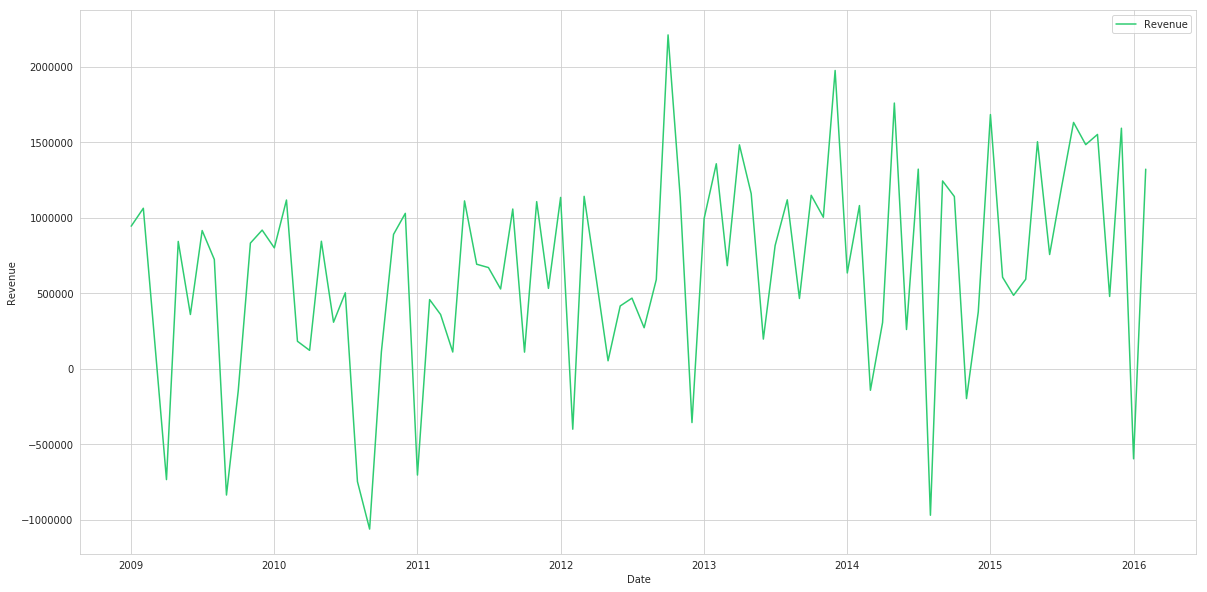

In [11]:
#plot revenue data (date vs revenue)
sns.lineplot(data.index,data['Revenue'],color='#2ecc71', label='Revenue')

- Our data is slighly not stationary.



#### Summary Statistics: 
-Review the summary statistics for our data for seasons or random partitions and check for obvious or significant differences.

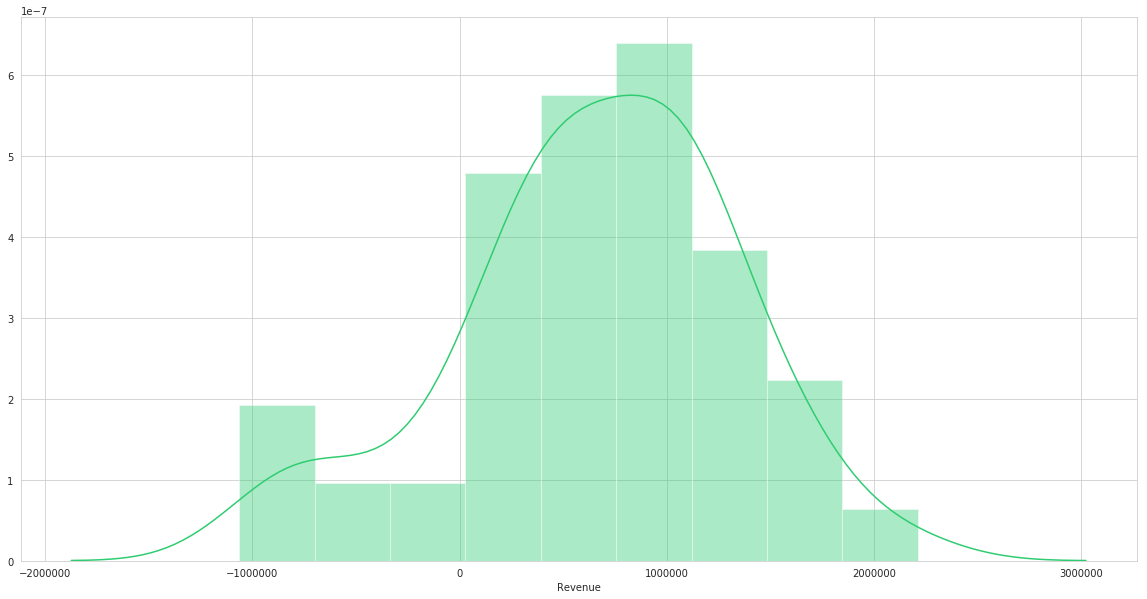

In [12]:
#plot the distribution
sns.distplot(data.Revenue, color='#2ecc71')

#### Statistical Tests::
-Use statistical tests to check if the expectations of stationarity are met or have been violated.

In [13]:
X = data.Revenue
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=432701.232558, mean2=868352.790698
variance1=356656434590.516113, variance2=483264222302.836121


> We have a non-stationary time series.

#plot the distribution
from numpy import log
logdata = data['Revenue']
logdata = log(logdata)
sns.distplot(logdata, color='#2ecc71')

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


---

### Moving Average

For each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.


In [15]:
# create
data = df.sort_index(ascending=True, axis=0)
data = data.reset_index()

In [16]:
data.dtypes

Date       datetime64[ns]
Revenue           float64
dtype: object

In [17]:
data[:5]

,Date,Revenue
0,2009-01-01,"943,690"
1,2009-02-01,"1,062,565"
2,2009-03-01,"210,079"
3,2009-04-01,"-735,286"
4,2009-05-01,"842,933"


In [18]:
#splitting into train and validation
# train is data from 2009 up to the 3rd quarter of 2015
# Validation is data from the last or 4th quarter of 2015 
# and 2 months of 2016
train = data[:81]
valid = data[81:]

> We cannot use random splitting to train and validation, since that will dearrange the chronological series of our time feature since we are using moving average.

> So here I have set the last year’s data into validation and the 4 years’ data before that into train.

In [19]:
data.shape, train.shape, valid.shape

((86, 2), (81, 2), (5, 2))

In [20]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2009-01-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'))

#### Predictions

In [21]:
#make predictions using moving averages
preds = []
for i in range(0,(valid.shape[0])):
    a = train['Revenue'][len(train)-valid.shape[0]+i:].sum() + sum(preds)
    b = a/(valid.shape[0])
    preds.append(b)

In [22]:
pd.DataFrame(preds)

,0
0,"1,314,314"
1,"1,276,464"
2,"1,380,558"
3,"1,417,325"
4,"1,374,541"


#### Results

In [23]:
#calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid['Revenue'])-preds),2)))
rms

979868.297139356

> RMSE does not help us understand how the model performed. Let’s visualize through a plot to get a more intuitive understanding. 

> So here is a plot of the predicted values along with the actual values.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


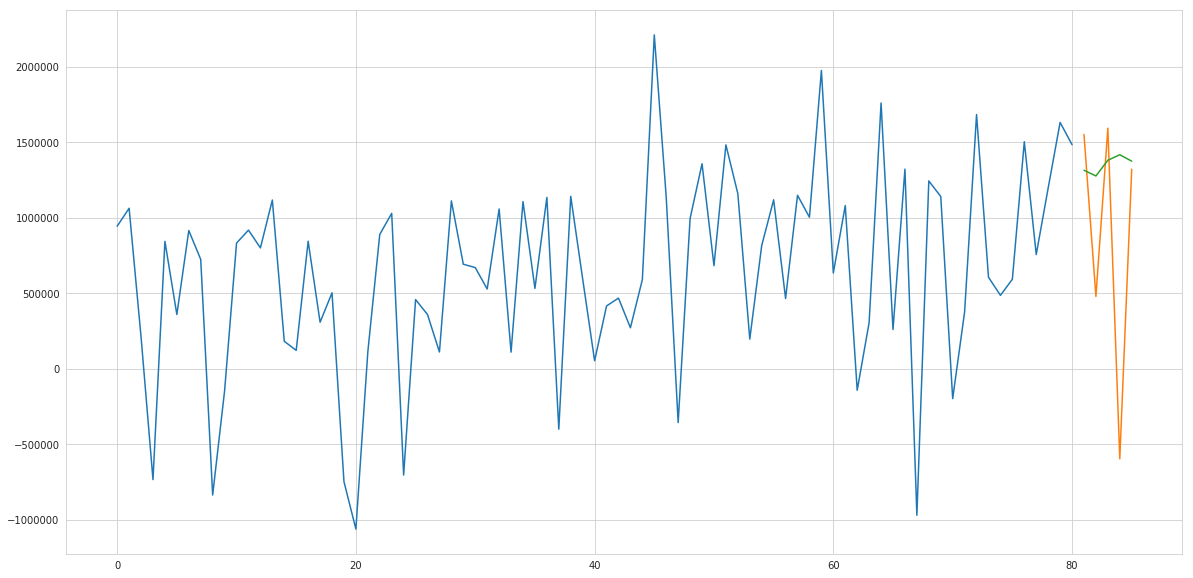

In [24]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Revenue'])
plt.plot(valid[['Revenue', 'Predictions']])

Results are not a good fit since our data have sharp spikes and averaging is not good on capturing that as it tried to smooth the transistion between steps.